In [2]:
import pandas as pd
data = pd.read_hdf(r"C:\Users\dell\Desktop\train_dc2020.h5", 'data')
venues=pd.read_csv(r"C:\Users\dell\Desktop\train_labels.csv")
test = pd.read_hdf(r"C:\Users\dell\Desktop\test_dc2020.h5", 'data')

In [69]:
data.head()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
0,4.5,562.5,0.002330,0.093197,-25.5,-545.5,0.046598,0.046598,-0.5,0.037279,...,0.004660,4,38930876675,-3.5,0.046598,2,38930876000,387,238,0
1,2.5,14.5,0.001314,0.013139,-10.5,-406.5,0.013139,0.026278,-0.5,0.013139,...,0.013139,2,46336088000,1.5,0.013139,4,46336087875,437,22,1
2,5.0,210.0,0.010792,0.010792,-95.0,-285.0,0.032376,0.021584,-3.0,0.010253,...,0.050615,2,57584792000,0.0,0.010792,2,57583312000,7,255,2
3,0.5,1.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.013886,-0.5,0.000069,...,0.013886,4,49549010300,0.5,0.006943,1,49549010200,48,64,3
4,15.0,442.0,0.035689,0.071378,-391.0,-397.0,0.035689,0.035689,3.0,0.035689,...,0.035689,2,42452055000,-8.0,0.035689,3,42451072650,52,231,4


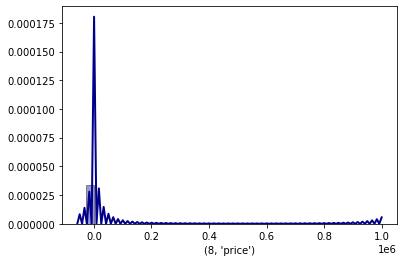

In [91]:
# Density Plot and Histogram of all arrival delays
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data[data.columns[86]], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

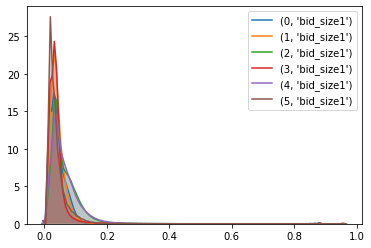

In [103]:
# library and dataset
import seaborn as sns 
# plot of 2 variables
p1=sns.kdeplot(data[(0, 'bid_size')], shade=True)
p1=sns.kdeplot(data[(1, 'bid_size')], shade=True)
p1=sns.kdeplot(data[(2, 'bid_size')], shade=True)
p1=sns.kdeplot(data[(3, 'bid_size')], shade=True)
p1=sns.kdeplot(data[(4, 'bid_size')], shade=True)
p1=sns.kdeplot(data[(5, 'bid_size')], shade=True)



#sns.plt.show()

In [74]:

out = []
for key, val in data.iloc[1].to_dict().items():
   if isinstance(key, tuple):
       key, idx = key
   else:
       continue
   out.append({'idx': idx, 'key': key, 'val': val})
out = pd.DataFrame(out).set_index(['key', 'idx']).unstack(-1)
out

val                                                                   \
idx  ask  ask1  ask_size ask_size1   bid   bid1  bid_size bid_size1 price   
key                                                                         
0    2.5  14.5  0.001314  0.013139 -10.5 -406.5  0.013139  0.026278  -0.5   
1    1.5   2.5  0.013139  0.032584  -1.5   -2.5  0.013139  0.039417  -0.5   
2    1.5   3.5  0.027592  0.039417  -1.5   -2.5  0.039417  0.026278  -0.5   
3    2.5  12.5  0.010511  0.013139  -8.5 -406.5  0.013139  0.013139  -0.5   
4    2.5   3.5  0.170805  0.161083  -1.5   -2.5  0.078833  0.118775  -0.5   
5    2.5   3.5  0.015767  0.027986  -1.5   -2.5  0.026278  0.065694  -0.5   
6    NaN   NaN       NaN       NaN   NaN    NaN       NaN       NaN  -0.5   
7    NaN   NaN       NaN       NaN   NaN    NaN       NaN       NaN   1.5   
8    NaN   NaN       NaN       NaN   NaN    NaN       NaN       NaN   1.5   
9    NaN   NaN       NaN       NaN   NaN    NaN       NaN       NaN   1.5   

                                                      
idx       qty source_id           tod ts_last_update  
key                                                   
0    0.013139       4.0  4.633610e+10   4.633609e+10  
1    0.013139       4.0  4.633610e+10   4.633610e+10  
2    0.078833       4.0  4.633610e+10   4.633610e+10  
3    0.013139       3.0  4.633610e+10   4.633610e+10  
4    0.013139       1.0  4.633610e+10   4.633610e+10  
5    0.039417       2.0  4.633610e+10   4.633609e+10  
6    0.013139       2.0  4.633610e+10            NaN  
7    0.013139       5.0  4.633609e+10            NaN  
8    0.013139       2.0  4.633609e+10            NaN  
9    0.013139       4.0  4.633609e+10            NaN

In [31]:
list(data.iloc[0].to_dict().items())[0][0]

(0, 'ask')

In [43]:
venues

,ID,source_id
0,0,2
1,1,2
2,2,2
3,3,4
4,4,2
...,...,...
959501,959501,4
959502,959502,1
959503,959503,3
959504,959504,4


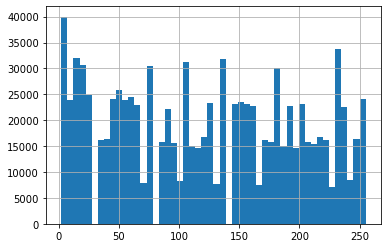

In [18]:
data.day_id.hist(bins = 50)

In [6]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_train, X_val, y_train, y_val = train_test_split(np.nan_to_num(data), venues.source_id, test_size = 0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300)

In [49]:
import xgboost as xgb


param_dist = {'objective':'multi:softmax', 'n_estimators':100}

clf = xgb.XGBClassifier(**param_dist)

clf.fit(data, venues.source_id,verbose=True)


[16:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [48]:

predictions= clf.predict(test)

sub= pd.DataFrame({'ID': test.ID, 'source_id': predictions})

sub.to_csv('SubmissionCFM.csv',index=False)

In [21]:
!pip install xgboost

In [77]:
data.columns[20]

(1, 'bid_size1')

In [85]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=193fbcd1382c973420996426026f26d46ec5afb236e5f3d1dd7a833cdbaae953
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
